# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones]

Departamento Electrónica

Universidad Popular del Cesar

José Ramón Iglesias

---

# Ejemplo de Uso de Support Vector Machines (SVM)






# Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Setup de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from   sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from   IPython.display import clear_output

## Carga de base de datos

En estos ejemplos usaremos las siguientes bases de datos de características para probar clasificadores:


* F2:  Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1

* G2: Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features. Classes: 1...2

* G3: Training data: 1200 samples with 2 features. Testing data: 600 samples with 2 features. Classes: 1...3

* G4: Training data: 800 samples with 2 features .Testing data: 400 samples with 2 features. Classes: 1...4

* P2: Training data: 1052 samples with 2 features. Testing data: 262 samples with 2 features. Classes: 0...1



In [ ]:
!wget https://www.dropbox.com/s/4knnagipqowhn7s/F2.zip?dl=0
!unzip F2

!wget https://www.dropbox.com/s/l7nvckkpl821b0q/G2.zip?dl=0
!unzip G2

!wget https://www.dropbox.com/s/wnm9zcfz9fd0g6e/G3.zip?dl=0
!unzip G3

!wget https://www.dropbox.com/s/3r634emj92o0tyy/G4.zip?dl=0
!unzip G4

!wget https://www.dropbox.com/s/q5dqgrlzj8cbc8p/P2.zip?dl=0
!unzip P2

clear_output()

print('Datos F2, F40, G3, G4 y P2 cargados.')


Datos F2, F40, G3, G4 y P2 cargados.


## Funciones necesarias

In [2]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds) 
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix"), plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    #colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
    #colors = 'Greens'
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Reds, alpha=0.8)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def plot_decision_heatmap(clf,X,d,st,show=0):
    # based on example of https://scikit-learn.org
    h = 0.075
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    plot_features(X,d,st)
    if show==1:
        plt.show()




def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0) 
    accst = f'Acc = {acc:.4f}'    
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                             # confusion matrix in training
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(X,d,st+' - Training: '+accst,0)     # feature space in training   
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt) 
    accst = f'Acc = {acc:.4f}'    
    print_confusion(dt,ds)                            # confusion matrix in testing
    plot_decision_lines(clf,X,0,decisionline)          # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,1)    # feature space in testing

# Training/Testing Data

Cargando G2...
Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features
      Classes: 1...2


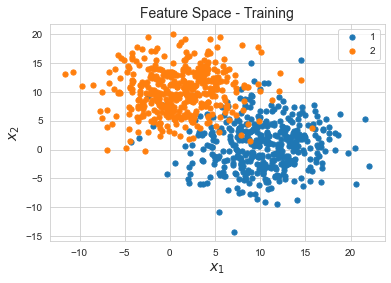

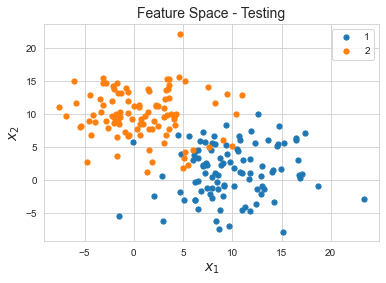

In [4]:
data = 'G2' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Cargando '+data+'...')

Xtrain,ytrain,Xtest,ytest   = load_features(data + '/' + data)   # load training and testing data

plot_features(Xtrain,ytrain,'Training')
plot_features(Xtest,ytest,'Testing')


# Parámetros

Explicación de los parámetros `C` y `gamma` del SVM: ver [aquí](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

# SVM lineal

Training:
Confusion Matrix:
[[373  27]
 [ 16 384]]
Accuracy = 94.62
Testing:
Confusion Matrix:
[[96  4]
 [10 90]]
Accuracy = 93.00


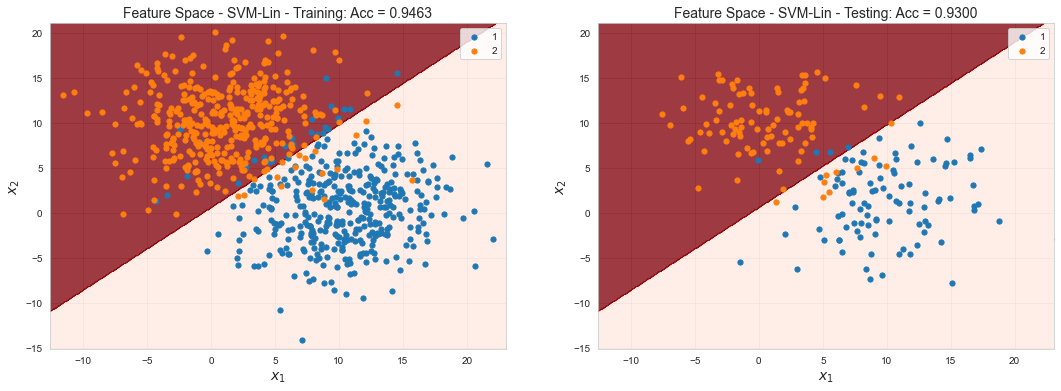

In [5]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "linear", gamma=0.2, C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Lin',decisionline=1)



C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_18964/3165162573.py:65: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)


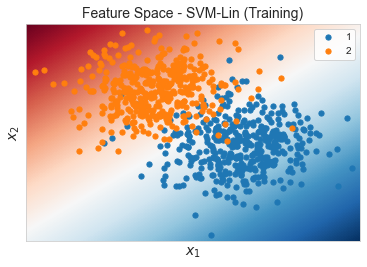

In [6]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Lin (Training)')

# SVM Polinomial

Training:
Confusion Matrix:
[[389  11]
 [ 41 359]]
Accuracy = 93.50
Testing:
Confusion Matrix:
[[98  2]
 [11 89]]
Accuracy = 93.50


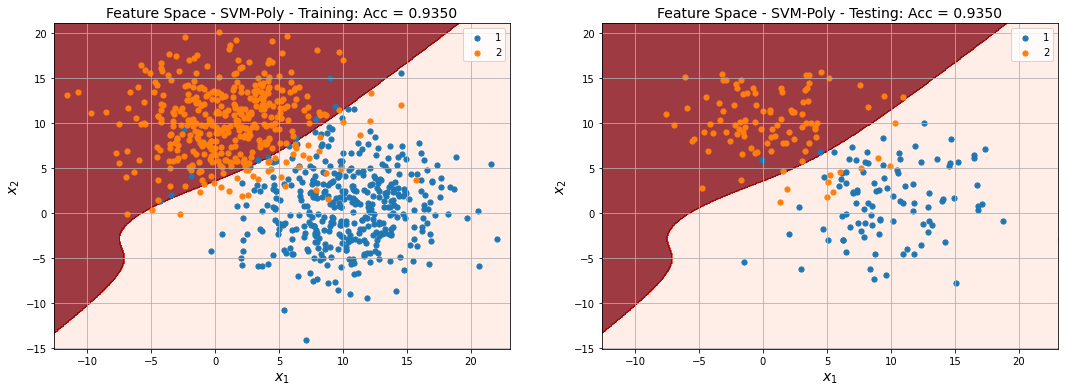

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "poly", gamma=0.2, degree = 3, C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Poly',decisionline=1)



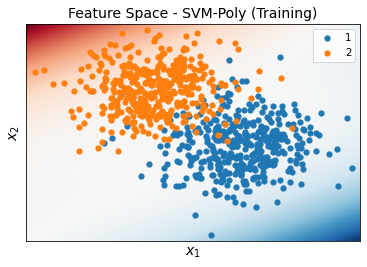

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Poly (Training)')

# SVM RBF

Training:
Confusion Matrix:
[[382  18]
 [ 20 380]]
Accuracy = 95.25
Testing:
Confusion Matrix:
[[96  4]
 [12 88]]
Accuracy = 92.00


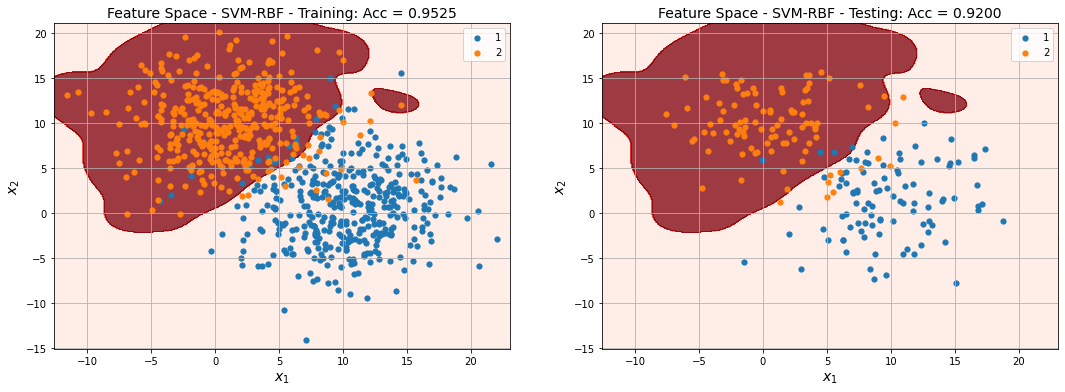

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "rbf", gamma=0.2,C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-RBF',decisionline=1)



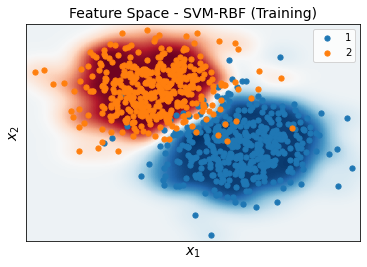

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-RBF (Training)')

# SVM Sigmoid

Training:
Confusion Matrix:
[[350  50]
 [ 52 348]]
Accuracy = 87.25
Testing:
Confusion Matrix:
[[86 14]
 [13 87]]
Accuracy = 86.50


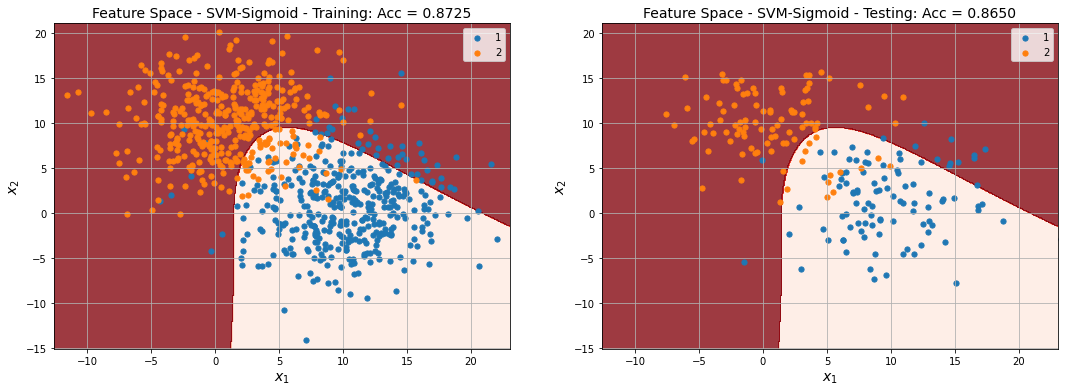

In [ ]:
from sklearn.svm import SVC

# Training
clf = SVC(kernel = "sigmoid", gamma=0.01, C=1.5)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
show_clf_results(clf,Xtrain,ytrain,Xtest,ytest,y0,ypred,'SVM-Sigmoid',decisionline=1)

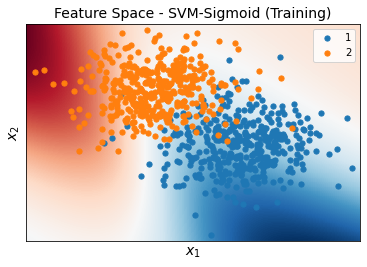

In [ ]:
plot_decision_heatmap(clf,Xtrain,ytrain,'SVM-Sigmoid (Training)')

In [ ]:
from sklearn.svm import SVC as SVM

# Training
clf = SVM(kernel = "rbf", gamma=0.2,C=0.1)
#clf = SVM(kernel = "linear", gamma=0.2, C=0.1)

clf.fit(Xtrain, ytrain)

# Evaluation on training subset 
y0  = clf.predict(Xtrain)
    
# Evaluation on testing subset 
ypred  = clf.predict(Xtest)

# Display results 
C   = confusion_matrix(ytest,ypred) 
print('Confusion Matrix:')
print(C)
acc = accuracy_score(ytest,ypred) 
acc_st = "{:.2f}".format(acc*100)
print('Accuracy = '+str(acc_st))



Confusion Matrix:
[[93  6  1]
 [ 4 94  2]
 [ 1  2 97]]
Accuracy = 94.67
